In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [48]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Check for Missing Values

In [49]:
# Check for null values in the entire DataFrame
null_values_total = df.isnull().sum().sum()
print("Total null values in DataFrame:", null_values_total)

# Check for null values in each column
null_values_per_column = df.isnull().sum()
print("\nNull values per column:")
print(null_values_per_column)

# Check for null values in each row
null_values_per_row = df.isnull().sum(axis=1)
print("\nNull values per row:")
print(null_values_per_row)

Total null values in DataFrame: 22514

Null values per column:
User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

Null values per row:
0        2
1        2
2        2
3        2
4        2
        ..
11246    2
11247    2
11248    2
11249    2
11250    2
Length: 11251, dtype: int64


## DROP

In [51]:
# Drop empty rows permanently
df.dropna(axis=0, how='all', inplace=True)

# Drop empty columns permanently
df.dropna(axis=1, how='all', inplace=True)

null_values_per_row = df.isnull().sum(axis=1)
print("\nNull values per row:")
print(null_values_per_row)


Null values per row:
0        0
1        0
2        0
3        0
4        0
        ..
11246    0
11247    0
11248    0
11249    0
11250    0
Length: 11251, dtype: int64


In [54]:
# Check for null values in the entire DataFrame
null_values_total = df.isnull().sum().sum()
print("Total null values in DataFrame:", null_values_total)

# Check for null values in each column
null_values_per_column = df.isnull().sum()
print("\nNull values per column:")
print(null_values_per_column)

# Check for null values in each row
null_values_per_row = df.isnull().sum(axis=1)


print("\nNull values per row:")
print(null_values_per_row)

Total null values in DataFrame: 0

Null values per column:
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Null values per row:
0        0
1        0
2        0
3        0
4        0
        ..
11246    0
11247    0
11248    0
11249    0
11250    0
Length: 11251, dtype: int64


## MEAN

In [53]:
def fill_null(df):
    # Define representations of null values
    null_values = ['NA', 'NALL', 'N/A', 'NULL', 'NaN', 'nan', 'Nan', '']  # Add more as needed

    # Replace representations of null values with actual NaN
    df.replace(null_values, np.nan, inplace=True)

    # Fill null values with mean for numeric columns
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            
    # Fill any remaining NaN values
    df.fillna(method='ffill', inplace=True)  # Forward fill remaining NaN values


    return df

df = fill_null(df)
print(df)


       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

## MEDIAN

In [55]:
def fill_null_with_median(df):
    # Define representations of null values
    null_values = ['NA', 'NALL', 'N/A', 'NULL', 'NaN', 'nan', 'Nan', '']  # Add more as needed

    # Replace representations of null values with actual NaN
    df.replace(null_values, np.nan, inplace=True)

    # Fill null values with median for numeric columns
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)

    # Fill any remaining NaN values
    df.fillna(method='ffill', inplace=True)  # Forward fill remaining NaN values

    return df

df = fill_null_with_median(df)
print(df)


       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

## MODE

In [56]:
def fill_null_with_mode(df):
    # Define representations of null values
    null_values = ['NA', 'NALL', 'N/A', 'NULL', 'NaN', 'nan', 'Nan', '']  # Add more as needed

    # Replace representations of null values with actual NaN
    df.replace(null_values, np.nan, inplace=True)

    # Fill null values with mode for object columns
    for col in df.columns:
        if df[col].dtype == 'object':
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)

    # Fill any remaining NaN values
    df.fillna(method='ffill', inplace=True)  # Forward fill remaining NaN values

    return df

df = fill_null_with_mode(df)
print(df)


       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

## INTERPOLATE

In [57]:
def fill_null_with_interpolate(df):
    # Define representations of null values
    null_values = ['NA', 'NALL', 'N/A', 'NULL', 'NaN', 'nan', 'Nan', '']  # Add more as needed

    # Replace representations of null values with actual NaN
    df.replace(null_values, np.nan, inplace=True)

    # Interpolate to fill null values
    df.interpolate(method='linear', inplace=True)

    return df

df = fill_null_with_interpolate(df)
print(df)


       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

## DUPLICATES

In [58]:
import pandas as pd

def check_duplicates(df):
    duplicates = df[df.duplicated(keep=False)]
    total_duplicates = len(duplicates)
    return duplicates, total_duplicates

duplicates, total_count = check_duplicates(df)
print("Total count of duplicates:", total_count)
print("Duplicates:")
print(duplicates)


Total count of duplicates: 16
Duplicates:
       User_ID   Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
18     1001883     Praneet  P00029842      M     51-55   54               1   
19     1001883     Praneet  P00029842      M     51-55   54               1   
4403   1004725     Jackson  P00150842      F     36-45   37               1   
4404   1004725     Jackson  P00150842      F     36-45   37               1   
5702   1003208      Bowman  P00171642      F     26-35   31               0   
5703   1003208      Bowman  P00171642      F     26-35   31               0   
5907   1001260     Dheeraj  P00344042      M     26-35   28               0   
5908   1001260     Dheeraj  P00344042      M     26-35   28               0   
6172   1001325       Reese  P00111742      F     26-35   27               1   
6173   1001325       Reese  P00111742      F     26-35   27               1   
8650   1000083        Gute  P00242842      M     26-35   35               0   
8651   100

### DROP DUPLICATES

In [59]:
def drop_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df

df = drop_duplicates(df)
print(df)

df.info()


       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

## OUTLIERS

## Z_Score

In [63]:
def detect_outliers_zscore(df, threshold=3):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Calculate z-scores
    z_scores = np.abs((df_numeric - df_numeric.mean()) / df_numeric.std())
    
    # Identify outliers
    outliers = df[z_scores > threshold].dropna(how='all')
    
    # Calculate total number of outliers
    total_outliers = outliers.shape[0]
    
    return outliers, total_outliers

outliers_zscore, total_outliers_zscore = detect_outliers_zscore(df)
print("Total outliers detected using z-score method:", total_outliers_zscore)


Total outliers detected using z-score method: 218


## IQR

In [64]:
def detect_outliers_iqr(df, threshold=1.5):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Calculate quartiles
    q1 = df_numeric.quantile(0.25)
    q3 = df_numeric.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Identify outliers
    outliers = df[(df_numeric < lower_bound) | (df_numeric > upper_bound)].dropna(how='all')
    
    # Calculate total number of outliers
    total_outliers = outliers.shape[0]
    
    return outliers, total_outliers

outliers_iqr, total_outliers_iqr = detect_outliers_iqr(df)
print("Total outliers detected using IQR method:", total_outliers_iqr)


Total outliers detected using IQR method: 303


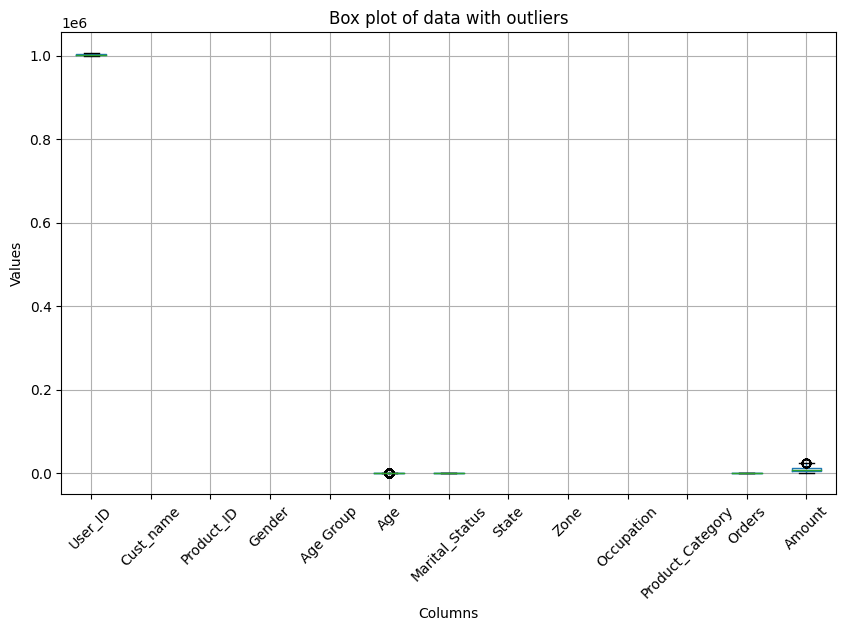

In [65]:
import matplotlib.pyplot as plt

def visualize_outliers_boxplot(df):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Create box plot
    plt.figure(figsize=(10, 6))
    df_numeric.boxplot()
    plt.title('Box plot of data with outliers')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()

visualize_outliers_boxplot(df)


<Figure size 1200x800 with 0 Axes>

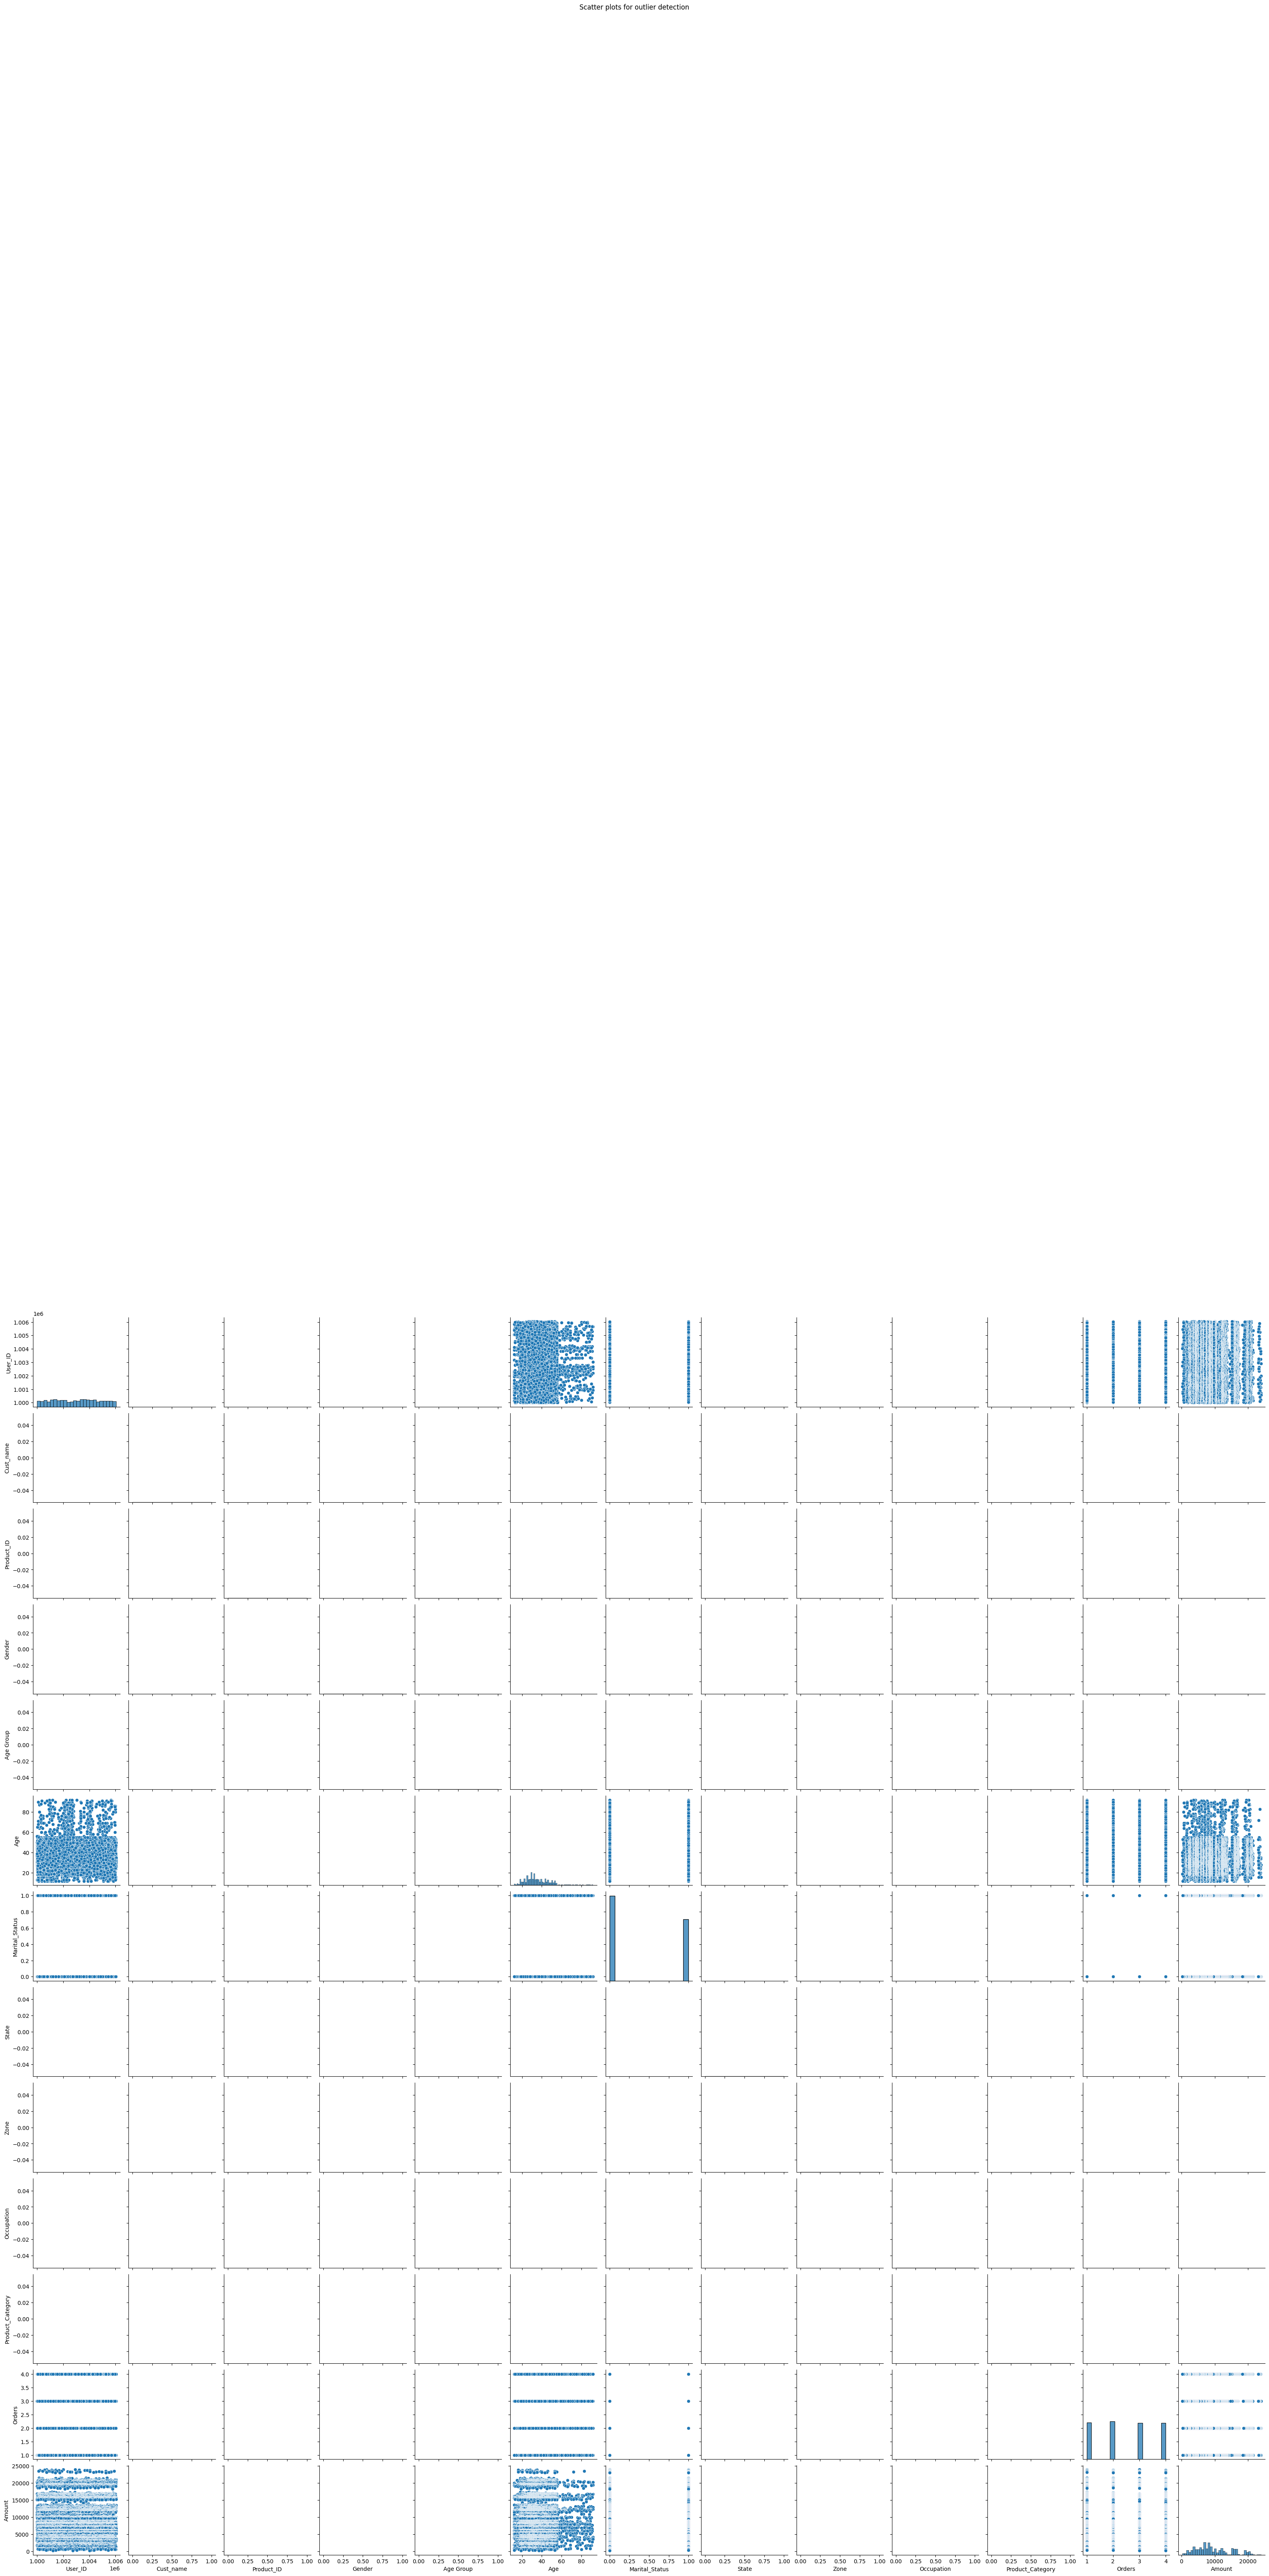

In [37]:
import seaborn as sns

def visualize_outliers_scatter(df):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Create scatter plots for each pair of columns
    plt.figure(figsize=(12, 8))
    sns.pairplot(df_numeric)
    plt.suptitle('Scatter plots for outlier detection', y=2.0)
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame

# Example DataFrame
#data = {
  #  'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
  # 'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'User_ID']  # Non-numeric value included
#}
#df = pd.DataFrame(data)

visualize_outliers_scatter(df)


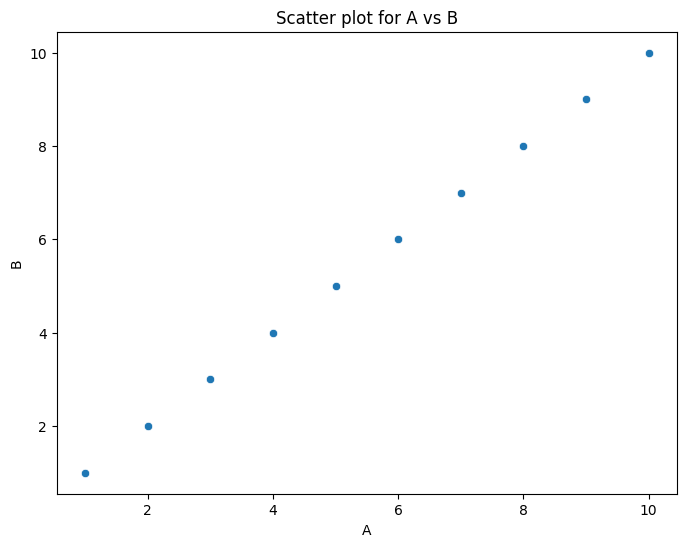

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_outliers_scatter_zoom(df, x_col, y_col, xlim=None, ylim=None):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df_numeric)
    
    # Set limits for x-axis and y-axis if specified
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    
    plt.title(f'Scatter plot for {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame

# Example DataFrame
#data = {
 #   'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
 #   'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'User_ID']  # Non-numeric value included
#}
#df = pd.DataFrame(data)

# Specify columns for scatter plot and limits for x-axis and y-axis
#x_col = 'A'
#y_col = 'B'
xlim = None  # No limits for x-axis
ylim = None  # No limits for y-axis

visualize_outliers_scatter_zoom(df, x_col, y_col, xlim, ylim)
